In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid") # Set plot style

In [ ]:
# Step 1: Load the Data & Rename Columns
books = pd.read_csv("../data/raw/Books.csv", encoding="latin1", low_memory=False)
ratings = pd.read_csv("../data/raw/Ratings.csv", encoding="latin1")
users = pd.read_csv("../data/raw/Users.csv", encoding="latin1")

def clean_columns(df):
    df.columns = df.columns.str.lower().str.replace('-', '_', regex=True)

for df in [books, ratings, users]:
    clean_columns(df)

users.rename(columns={'age': 'user_age'}, inplace=True)
books.rename(columns={col: f"book_{col}" for col in ['year_of_publication', 'publisher','image_url_s', 'image_url_m', 'image_url_l'] if col in books.columns}, inplace=True)

# Step 2: Initial Overview
print("Books Dataset Overview:")
print(books.info())
print("\nRatings Dataset Overview:")
print(ratings.info())
print("\nUsers Dataset Overview:")
print(users.info())

Books Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   isbn                      271360 non-null  object
 1   book_title                271360 non-null  object
 2   book_author               271358 non-null  object
 3   book_year_of_publication  271360 non-null  object
 4   book_publisher            271358 non-null  object
 5   book_image_url_s          271360 non-null  object
 6   book_image_url_m          271360 non-null  object
 7   book_image_url_l          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None

Ratings Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1

In [3]:
books.head()

,isbn,book_title,book_author,book_year_of_publication,book_publisher,book_image_url_s,book_image_url_m,book_image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
users.head()

,user_id,location,user_age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
# Step 3: Check and Handle Missing Values

# Books
print('Books:')
print(books.isnull().sum()[lambda x: x > 0])

books['book_author'] = books['book_author'].fillna('Unknown')
books['book_publisher'] = books['book_publisher'].fillna('Unknown')
books['book_image_url_l'] = books['book_image_url_l'].fillna('-')

books['book_year_of_publication'] = pd.to_numeric(books['book_year_of_publication'], errors='coerce') # Convert the column to numeric, invalid years become NaN
books['book_year_of_publication'] = books['book_year_of_publication'].fillna(books['book_year_of_publication'].median()) # fill with median because it's robust to outliers

# Ratings
print('\nRatings:')
print(ratings.isnull().sum()[lambda x: x > 0])

# Users
print('\nUsers:')
print(users.isnull().sum()[lambda x: x > 0])

users['user_age'] = users['user_age'].fillna(users['user_age'].median()).astype(int)

Books:
book_author         2
book_publisher      2
book_image_url_l    3
dtype: int64

Ratings:
Series([], dtype: int64)

Users:
user_age    110762
dtype: int64


In [7]:
# Step 4 : Split `location` Column

location_split = users['location'].str.split(',', expand=True)

users['user_city'] = location_split[0].str.strip().str.upper()
users['user_state'] = location_split[1].str.strip().str.upper()
users['user_country'] = location_split[2].str.strip().str.upper()

users = users.drop(columns=['location'])

users.head()

,user_id,user_age,user_city,user_state,user_country
0,1,32,NYC,NEW YORK,USA
1,2,18,STOCKTON,CALIFORNIA,USA
2,3,32,MOSCOW,YUKON TERRITORY,RUSSIA
3,4,17,PORTO,V.N.GAIA,PORTUGAL
4,5,32,FARNBOROUGH,HANTS,UNITED KINGDOM


In [8]:
# Step 5: Check and Handle Duplicate Values

# Check for duplicate rows in Books
duplicates_books = books.duplicated(subset=['isbn']).sum()
print(f"Duplicate books: {duplicates_books}")

# Check for duplicate rows in Users
duplicates_users = users.duplicated(subset=['user_id']).sum()
print(f"Duplicate users: {duplicates_users}")

# Check for duplicate rows in Ratings
duplicates_ratings = ratings.duplicated(subset=['user_id', 'isbn']).sum()
print(f"Duplicate ratings: {duplicates_ratings}")

Duplicate books: 0
Duplicate users: 0
Duplicate ratings: 0


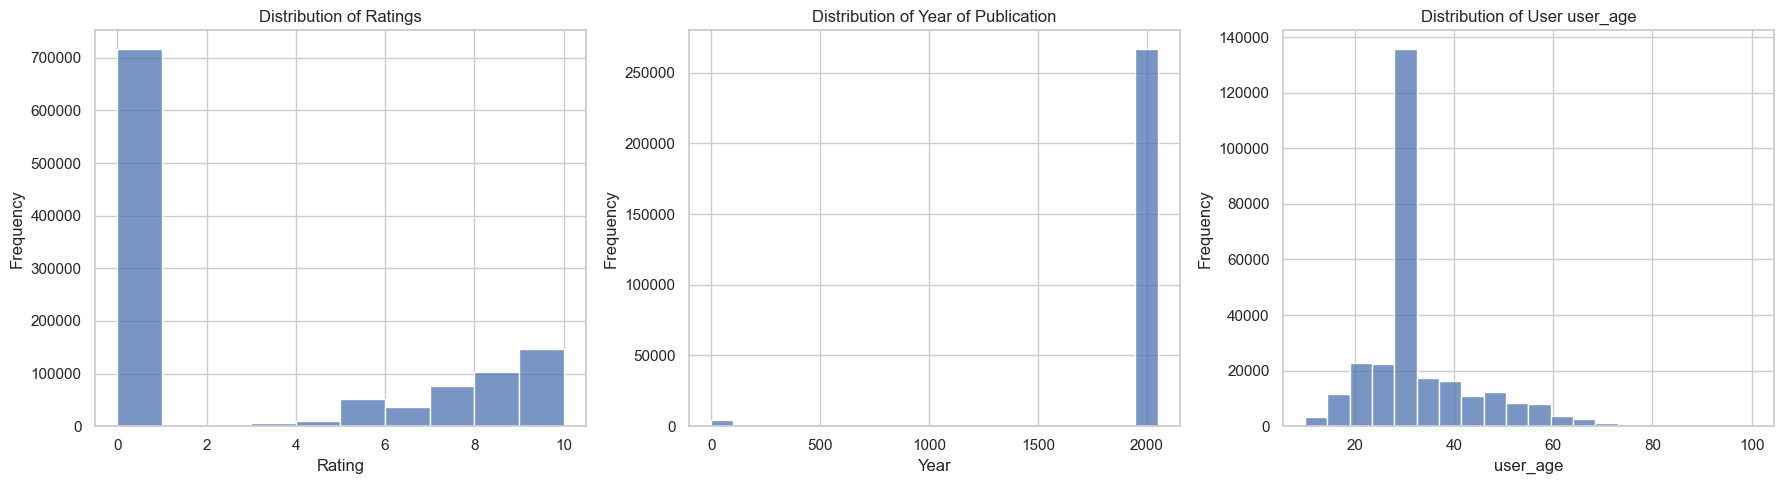

In [9]:
# Step 6: Exploratory Analysis

# Set the figure size and layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Distribution of Ratings
sns.histplot(ratings['book_rating'], bins=10, kde=False, ax=axes[0])
axes[0].set_title("Distribution of Ratings")
axes[0].set_xlabel("Rating")
axes[0].set_ylabel("Frequency")

# Plot 2: Distribution of Year of Publication
sns.histplot(books['book_year_of_publication'], bins=20, kde=False, ax=axes[1])
axes[1].set_title("Distribution of Year of Publication")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Frequency")

# Plot 3: Distribution of user_age
filtered_users = users[(users['user_age'] >= 10) & (users['user_age'] <= 100)]  # Filter out unrealistic ages
sns.histplot(filtered_users['user_age'], bins=20, kde=False, ax=axes[2])
axes[2].set_title("Distribution of User user_age")
axes[2].set_xlabel("user_age")
axes[2].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

# Save Image
fig.savefig(os.path.join("../images", "book_rating_distribution_plots.png"))

# Explanation:
From the histogram above, we can observe the following:
1. A significant number of ratings are 0, which might indicate a lack of explicit feedback. These could be considered as "implicit feedback," representing cases where users interacted with a book but didn’t provide a formal rating.
2. Ratings from 1 to 10 are sparsely distributed, with higher frequencies around the upper end (8–10). This suggests that users tend to rate books they enjoy highly
3. The majority of books were published in recent decades. Outliers (very old or future years) may require handling in preprocessing
4. Most users fall within a young to middle-aged range, with a notable spike around the median user_age. Understanding user demographics is critical for personalization
5. High ratings (8–10) dominate, so the model should account for this bias to avoid recommending only popular books
6. We need to address all of this during modeling as they could skew the results : rows where the user_age data is unrealistic (such as ages over 100), publication year value of 0, and ratings of 0

In [10]:
# Step 7: Merge Datasets

ratings_with_detailed_users = pd.merge(ratings, users, on='user_id', how='inner')
ratings_with_detailed_users_and_books = pd.merge(ratings_with_detailed_users, books, on='isbn', how='inner')

print("\nFinal Merged Dataset Overview:")
print(ratings_with_detailed_users_and_books.info())

# Step 8: Save Processed Data
processed_path = "../data/processed/ratings_with_detailed_users_and_books.csv"
ratings_with_detailed_users_and_books.to_csv(processed_path, index=False)
print(f"Processed dataset saved to {processed_path}")


Final Merged Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 14 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   user_id                   1031136 non-null  int64  
 1   isbn                      1031136 non-null  object 
 2   book_rating               1031136 non-null  int64  
 3   user_age                  1031136 non-null  int64  
 4   user_city                 1031136 non-null  object 
 5   user_state                1031136 non-null  object 
 6   user_country              1031136 non-null  object 
 7   book_title                1031136 non-null  object 
 8   book_author               1031136 non-null  object 
 9   book_year_of_publication  1031136 non-null  float64
 10  book_publisher            1031136 non-null  object 
 11  book_image_url_s          1031136 non-null  object 
 12  book_image_url_m          1031136 non-null  object 
